# **Selfie Capture When We Smile**

Most smartphones these days have a feature that automatically takes a selfie when we smile. It is amazing how accurately it detects smiles for not only one but multiple faces and captures a selfie immediately. If you have wondered how this is possible, it is actually quite simple. Using some of the libraries like dlib and OpenCV it is possible to build a selfie capturing application with just a few lines of code. The concept involved here to identify the mouth region using dlib, measure the distance between the corners of the lips when the user smiles and immediately capture a picture. Let’s get started!

In this practice session, we will learn how to build a selfie capture application that automatically clicks pictures of you when you smile. 

## **Procedure:**

> * Using the 68-point landmark of dlib we will detect the lip points and write relevant functions.
> * Face recognition 
> * Detect smile and automatically capture and save the image. 

## **Finding the Mouth Region Using the 68 Point Landmark Detector.**

In [ ]:

!python -m pip install pip --upgrade --user -q --no-warn-script-location
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn nltk opencv-python tensorflow keras torch torchvision \
    tqdm scikit-image pixellib pytube dlib --user -q --no-warn-script-location

import IPython
IPython.Application.instance().kernel.do_shutdown(True)


In [1]:
# !wget -nd https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat

--2021-06-01 04:16:10--  https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat [following]
--2021-06-01 04:16:10--  https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[===================>]  95.08M   196MB/s    in 0.5s    

2021-06-01 04:16:12 (196 M

The 68 point landmark detector is part of the dlib library. It assigns 68 coordinates to every human face which makes detection of specific regions like lips, eyes, nose easier. If you have not already installed dlib you can do so by 

In [2]:
!python -m pip install dlib --user -q

The first step is to identify the region around the mouth

We have identified that the mouth region lies between points 48 to 59. To establish the ration of the mouth we need to find the distance between the corner of the lips, top and bottom of the lip and the left and right regions of the mouth. 

To find the ratio of the region we can use the euclidean distance formula as follows:
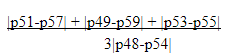

Now with these 8 points, we can successfully isolate the mouth region. To avoid confusion while programming, we can splice the array between 0 and 8 instead of between 48 to 59.

We will now load the libraries and write the function to isolate the mouth region. 

In [3]:
from imutils.video import VideoStream, FPS
from imutils import face_utils
import imutils
import numpy as np
import time
import dlib
import cv2
from scipy.spatial import distance as dist
landmark_detect = dlib.get_frontal_face_detector()
landmark_predict = dlib.shape_predictor('https://gitlab.com/AnalyticsIndiaMagazine/practicedatasets/-/raw/main/face_swapping/shape_predictor_68_face_landmarks.dat')
(smile_start,smile_end) = face_utils.FACIAL_LANDMARKS_IDXS["mouth"]
def detect_lips(lip):
    corner_A = dist.euclidean(lip[3], lip[9])
    corner_B = dist.euclidean(lip[2], lip[10])
    corner_C = dist.euclidean(lip[4], lip[8])
    avg = (corner_A+corner_B+corner_C)/3
    corner_D = dist.euclidean(lip[0], lip[6])
    ratio=avg/corner_D
    return ratio

## **Face Recognition**

Next, we will open the web camera. Before we implement a smile detector we need to recognize the face. We will use convexHull from the OpenCV to detect faces. Once the faces are detected we will draw anchor boxed around the mouth. 

In [4]:
webcam = VideoStream(src=0).start()
while True:
    window_frame = webcam.read()
    window_frame = imutils.resize(window_frame, width=450)
    gray = cv2.cvtColor(window_frame, cv2.COLOR_BGR2GRAY)
    anchor = landmark_detect(gray, 0)
    for box in anchor:
        smile_finder = landmark_predict(gray, box)
        smile_finder = face_utils.shape_to_np(smile_finder)
        smile= smile_finder[smile_start:smile_end]
        ratio= detect_lips(smile)
        smileHull = cv2.convexHull(smile)
        cv2.drawContours(window_frame, [smileHull], -1, (255, 0, 0), 1)

AttributeError: ignored

In the above code, we have used the dawContours to draw a red coloured box. Once this is done we just need to auto-capture the image.

## **Selfie Capture**

 We will set the time between 20 and 25 frames before the selfie is captured. The images are saved in the same folder as the file you are running. 

In [5]:
count = 0
tot = 0
if ratio <= .2 or ratio > .25 :
  count = count+1
else:
  if count >= 10:
    tot= tot+1
    window_frame = webcam.read()
    time.sleep(.3)
    frame2= window_frame.copy()
    save_img = "selfie{}.png".format(tot)
    cv2.imwrite(save_img, window_frame)
    print("{} captured".format(save_img))
    count = 0

NameError: ignored

The last step is to show the frame on the screen and see the output. 

In [ ]:
cv2.imshow("Frame", window_frame)

We will also set q as the exit button for closing the window once the user is done. 

In [ ]:
key2 = cv2.waitKey(1) & 0xFF
    if key2 == ord('q'):
        break
cv2.destroyAllWindows()
webcam.stop()

All the captured images are stored in the same folder as your project. One of the captured pictures is given below.

#**Related Articles:**

> * [Selfie Capture When you Smile](https://analyticsindiamag.com/selfie-capture-when-we-smile-my-fun-project-using-opencv/)

> * [Bitwise Operations On Images Using OpenCV](https://analyticsindiamag.com/how-to-implement-bitwise-operations-on-images-using-opencv/)

> * [Face Swaping with OpenCV](https://analyticsindiamag.com/a-fun-project-on-building-a-face-swapping-application-with-opencv/)

> * [Create Watermark Images with OpenCV](https://analyticsindiamag.com/how-to-create-a-watermark-on-images-using-opencv/)

> * [Convert Image to Cartoon](https://analyticsindiamag.com/converting-an-image-to-a-cartoon/)

> * [Sudoku Game with Deep Learning, OpenCV and Backtracking](https://analyticsindiamag.com/solve-sudoku-puzzle-using-deep-learning-opencv-and-backtracking/)

